In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 1. Read the dataset to python environment

In [3]:
df = pd.read_excel('iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


 2. Do the necessary pre-processing steps

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['SL'] = df['SL'].fillna(df['SL'].mean())
df['SW'] = df['SW'].fillna(df['SW'].mean())
df['PL'] = df['PL'].fillna(df['PL'].mean())

In [6]:
df.isna().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


<Axes: >

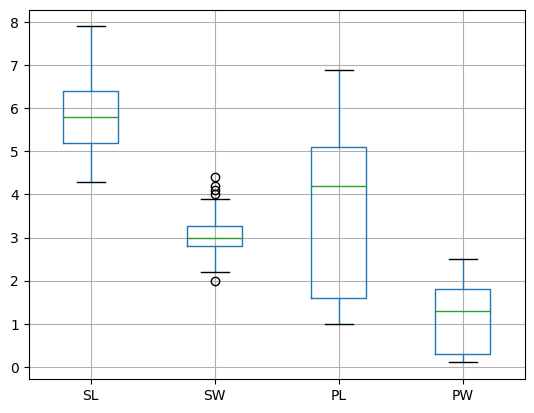

In [13]:
df.boxplot()

In [14]:
Q1=np.percentile(df['SW'],25)
Q3=np.percentile(df['SW'],75)
print(Q1)
print(Q3)

2.8
3.275


In [20]:
IQR=Q3-Q1
l=Q1-1.5*IQR
u=Q3+1.5*IQR

In [21]:
outlier=[]
for x in df['SW']:
  if x>u or x<l:
    outlier.append(x)
len(outlier)

5

In [22]:
ind =(df['SW']>u) | (df['SW']<l)
df.loc[ind].index

Index([14, 15, 32, 33, 60], dtype='int64')

In [23]:
df.drop([14, 15, 32, 33, 60],inplace=True)

In [27]:
x = df.drop(['Classification'],axis=1)
y = df['Classification']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y = encoder.fit_transform(y)

3. Find out which classification model gives the best result (try all the classification algorithms discussed in the sessions)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Logistic Regression



In [60]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(multi_class='ovr', max_iter = 200)
reg = reg.fit(x_train,y_train)
y_pred_lr = reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [61]:
print('Accuracy :',accuracy_score(y_test,y_pred_lr))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_lr))
print('\nClassification Report :\n',classification_report(y_test,y_pred_lr))

Accuracy : 0.9090909090909091

Confusion Matrix 
 [[14  1  0]
 [ 0 11  0]
 [ 0  3 15]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.73      1.00      0.85        11
           2       1.00      0.83      0.91        18

    accuracy                           0.91        44
   macro avg       0.91      0.92      0.91        44
weighted avg       0.93      0.91      0.91        44



SVM

In [58]:
model = SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred_svm = model.predict(x_test)

In [59]:
print('Accuracy :',accuracy_score(y_test,y_pred_svm))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_svm))
print('\nClassification Report :\n',classification_report(y_test,y_pred_svm))

Accuracy : 0.9090909090909091

Confusion Matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  3 15]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.77      0.91      0.83        11
           2       0.94      0.83      0.88        18

    accuracy                           0.91        44
   macro avg       0.90      0.91      0.91        44
weighted avg       0.92      0.91      0.91        44



Naive Bayes

In [64]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

In [65]:
print('Accuracy :',accuracy_score(y_test,y_pred_nb))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_nb))
print('\nClassification Report :\n',classification_report(y_test,y_pred_nb))

Accuracy : 0.9318181818181818

Confusion Matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  3 15]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        11
           2       1.00      0.83      0.91        18

    accuracy                           0.93        44
   macro avg       0.93      0.94      0.93        44
weighted avg       0.95      0.93      0.93        44



KNN

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [68]:
print('Accuracy :',accuracy_score(y_test,y_pred_knn))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_knn))
print('\nClassification Report :\n',classification_report(y_test,y_pred_knn))

Accuracy : 0.9318181818181818

Confusion Matrix 
 [[14  1  0]
 [ 0 10  1]
 [ 0  1 17]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.83      0.91      0.87        11
           2       0.94      0.94      0.94        18

    accuracy                           0.93        44
   macro avg       0.93      0.93      0.93        44
weighted avg       0.94      0.93      0.93        44



Decision Trees

In [69]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

In [70]:
print('Accuracy :',accuracy_score(y_test,y_pred_dt))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_dt))
print('\nClassification Report :\n',classification_report(y_test,y_pred_dt))

Accuracy : 0.9090909090909091

Confusion Matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  4 14]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.73      1.00      0.85        11
           2       1.00      0.78      0.88        18

    accuracy                           0.91        44
   macro avg       0.91      0.93      0.91        44
weighted avg       0.93      0.91      0.91        44



Random Forest

In [71]:
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)

In [72]:
print('Accuracy :',accuracy_score(y_test,y_pred_rf))
print('\nConfusion Matrix \n', confusion_matrix(y_test,y_pred_rf))
print('\nClassification Report :\n',classification_report(y_test,y_pred_rf))

Accuracy : 0.9090909090909091

Confusion Matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  4 14]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.73      1.00      0.85        11
           2       1.00      0.78      0.88        18

    accuracy                           0.91        44
   macro avg       0.91      0.93      0.91        44
weighted avg       0.93      0.91      0.91        44



The Naive Bayes and KNN give an accuracy of 0.93. Precision is better for Naive Bayes. Both seem to be suited for this problem. But cross_validation can be done.

In [73]:
from sklearn.model_selection import cross_val_score, KFold

models = {'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter = 200),
          'SVM': SVC(kernel='linear'),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Naive Bayes': GaussianNB(),
          'KNN': KNeighborsClassifier()}

In [74]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [76]:
print("Cross-Validation Results:")
for name, model_kf in models.items():
    scores = cross_val_score(model_kf, x, y, cv=kf)
    print(f"{name} Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-Validation Results:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Logistic Regression Accuracy: 0.90 ± 0.05
SVM Accuracy: 0.94 ± 0.04
Decision Tree Accuracy: 0.95 ± 0.04
Random Forest Accuracy: 0.96 ± 0.03
Naive Bayes Accuracy: 0.94 ± 0.04
KNN Accuracy: 0.94 ± 0.04


**On Cross-validation,**

Logistic Regression Accuracy: 0.90 ± 0.05

SVM Accuracy: 0.94 ± 0.04

Decision Tree Accuracy: 0.95 ± 0.04

Random Forest Accuracy: 0.96 ± 0.03

Naive Bayes Accuracy: 0.94 ± 0.04

KNN Accuracy: 0.94 ± 0.04

**So, it seems Decision Tree and Random Forest are best for the problem. But SVM , Naive Bayes and KNN also give good accuracy. Though Logistic Regression gives least accuracy among the models**
